In [123]:
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import os
import numpy as np
import tensorflow as tf

In [124]:
train_dir = '../Casting_products_keras/dataset/train_data'
test_dir = '../Casting_products_keras/dataset/test_data'

In [125]:
train_datagen = ImageDataGenerator(
    validation_split = 0.1,
    rotation_range = 360,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [126]:
batch_size = 32
SEED = 256

In [127]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (300, 300),
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'training'    
)

valid_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (300, 300),
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'validation'
)

Found 225 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


In [128]:
from keras import optimizers
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, GlobalAveragePooling2D, Activation, Dense
from PIL import Image

In [129]:
model = Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [130]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [131]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath='best_model_efficnetb3.h5',
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [132]:
history = model.fit(
    train_generator,
    validation_data = valid_generator,
    epochs = 25,
    callbacks = [model_checkpoint, early_stopping]    
)

Epoch 1/25
8/8 [==============================] - 103s 6s/step - loss: 1.6884 - accuracy: 0.4444 - val_loss: 0.6658 - val_accuracy: 0.6000
Epoch 2/25
8/8 [==============================] - 40s 4s/step - loss: 0.6650 - accuracy: 0.6000 - val_loss: 0.6589 - val_accuracy: 0.6000
Epoch 3/25
8/8 [==============================] - 30s 3s/step - loss: 0.6611 - accuracy: 0.6089 - val_loss: 0.5868 - val_accuracy: 0.6400
Epoch 4/25
8/8 [==============================] - 34s 4s/step - loss: 0.6127 - accuracy: 0.6800 - val_loss: 0.6205 - val_accuracy: 0.6400
Epoch 5/25
8/8 [==============================] - 25s 3s/step - loss: 0.6400 - accuracy: 0.6356 - val_loss: 0.5344 - val_accuracy: 0.6400
Epoch 6/25
8/8 [==============================] - 24s 3s/step - loss: 0.6245 - accuracy: 0.6533 - val_loss: 0.5921 - val_accuracy: 0.6400
Epoch 7/25
8/8 [==============================] - 35s 4s/step - loss: 0.5782 - accuracy: 0.6978 - val_loss: 0.4898 - val_accuracy: 0.8000
Epoch 8/25
8/8 [=================

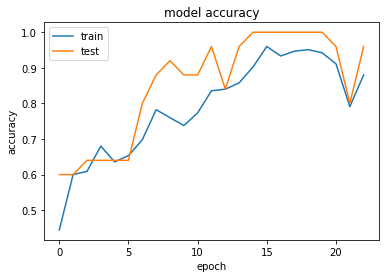

In [133]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [134]:
sample_submission_df = pd.read_csv('sample_submission.csv', header = None)

In [135]:
pred = []
for image_id in sample_submission_df[0]:
    img = Image.open(os.path.join(test_dir + '/' + image_id))
    img = img.resize((300, 300))
    img = np.expand_dims(img, axis = 0)
    img = (img - 127.5) / 127.5
    pred.append(np.round(model.predict(img)).astype(int).tolist())

In [136]:
pred = np.ravel(pred)

In [137]:
sample_submission_df[1] = pred
sample_submission_df.to_csv('sample_submission.csv', header = None, index = None)